# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** Karol Ożóg (419388) - AGH, WEAIiIB, AiR, 2. rok, CWL gr. 6.

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


***Analiza i wykonanie zadanie 1.***

Celem tego zadania jest implementacja dwóch funkcji. Pierwsza z nich *chebyshev_nodes()* służy do generowania wektora węzłów Czebyszewa drugiego rodzaju. W tym celu tworzymy najpierw pusty wektor x, któremu zadajemy kolejne elemnty zgodnie ze wzorem $\cos(\frac{k\pi}{(n-1)})$, dla kolejnych k od 0 do n-1. Forma wzora musiała zostać zmieniona względem tej z treści zadania gdyż tego wymagały testy. Druga funkcja *bar_cheb_weights()*, strukturą jest podobna do poprzedniej. Również najpierw tworzymy pusty któremu zajemy kolejne wartości jako 1 lub -1, poza kończami zadanego przedziału gdzie zadajemy $\pm \frac{1}{2}$. Węzły czebyszewa są używane jako węzły w interpolacji wielomianowej, są one dobrane tak aby minimalizowały efektr Rungego, czyli dużeo oscylacje na krańcach przedziału. Wagi barycentryczne natomiast określają jak ważna jest każda próbka przy wyliczaniu wartości interpolowanego wielomianu w dowolnym punkcie.

---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [43]:
# ===== Twoja implementacja tutaj =====

import numpy as np

f1  = lambda x: np.sign(x)*x + x**2
f2  = lambda x: np.sign(x)*x**2
f3  = lambda x: np.abs(np.sin(5*x))**3

f4a = lambda x: 1/(1 + 1*x**2)
f4b = lambda x: 1/(1 + 25*x**2)
f4c = lambda x: 1/(1 + 100*x**2)

f5  = lambda x: np.sign(x)



***Analiza i wykonanie zadanie 2.***

W tym zadaniu mamy zaimplementować proste funkcje które będziemy później interpolować wielomianami czebyszewa. Tworzymy 5 funkcji anonimowych z wykorzystaniem wyrażenia lambda. Do utworzenai funkcji wykorzystujemy funkcje singum przyjmującą wartość -1 dla argumentów mniejszych od 0 i +1 dla argumentów większych od 0, oraz 0 dla argumetnu równego 0. Funkcje mają różne właściwości jak np. nieróżniczkowalność czy nieciągłość, aby móc przetestować w póżniejszych zadaniach interpolacje takich funkji wielomianami. 

---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


***Analiza i wykonanie zadanie 3.***

W tym zadaniu mamy zaimplementować funkcję wyznaczającą normę wektorową dla dwóch zadnych wektorów. Norma ta jest zdefiniowana jako wartość maksymalna z elementów wektora utworzonego  po odjęciu przez siebie wartości dwóch wektorów pod wartością bezwzględną. W samej funkcji najpierw zamieniamy oba wektory na typy *np.array()* a następnie wyznaczamy wartość maksymalną z różnicy zgodnie ze wzorem zadanym w treści zadania, przy użyciu funkcji *np.max*. Tego typu norma zawsze wskazuje maksymalny błąd, jaki wystąpił podczas całego procesu interpolacji.

---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


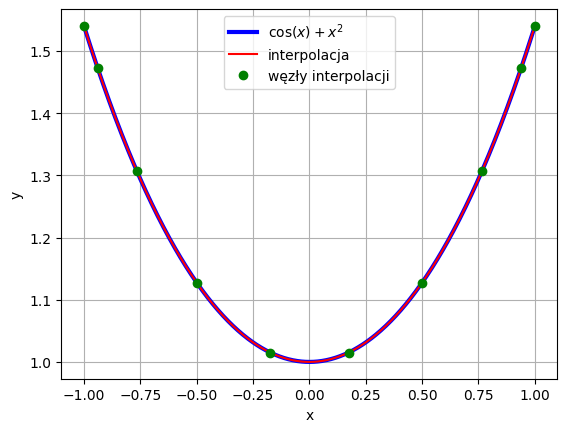

In [ ]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)
xch=np.array(xch)
# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)


plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

257 μs ± 73.3 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
17.3 ms ± 1.26 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Wyniki dla interpolacji dla 10^n pkt, gdzi n=  10 

Norma interpolacji wbuodwanej funkcji wynosi:  0.11011227778498278
Norma interpolacji funkcji zaimplementowanej w main wynosi:  0.11011227778498282
Czas potrzebny do interpolacji wbudowanej funkcji:  0.00025743799997144377
Czas potrzebny do interpolacji zaimplementowanej funkcji:  0.017319621999922673


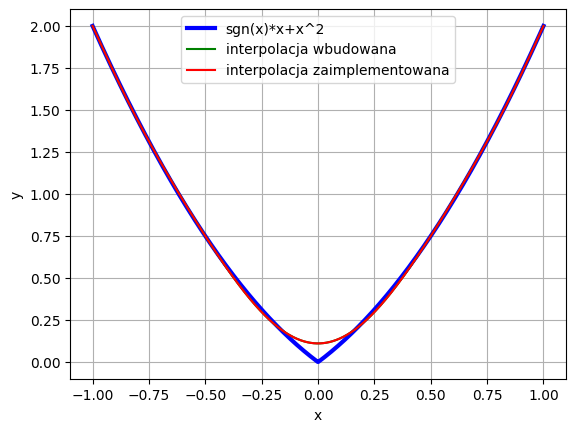

1.36 ms ± 111 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
85.4 ms ± 3.7 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Wyniki dla interpolacji dla 10^n pkt, gdzi n=  100 

Norma interpolacji wbuodwanej funkcji wynosi:  0.009124053856609098
Norma interpolacji funkcji zaimplementowanej w main wynosi:  0.009124053856609072
Czas potrzebny do interpolacji wbudowanej funkcji:  0.0013605139999708627
Czas potrzebny do interpolacji zaimplementowanej funkcji:  0.0854230319999624


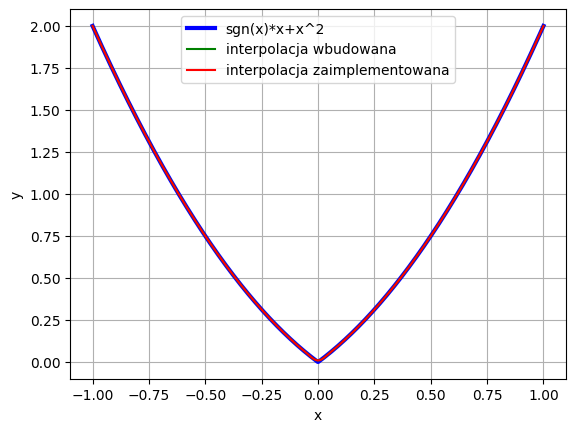

18.1 ms ± 1.31 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
927 ms ± 104 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Wyniki dla interpolacji dla 10^n pkt, gdzi n=  1000 

Norma interpolacji wbuodwanej funkcji wynosi:  0.00023808283885480412
Norma interpolacji funkcji zaimplementowanej w main wynosi:  0.00023808283885475554
Czas potrzebny do interpolacji wbudowanej funkcji:  0.018093230000013137
Czas potrzebny do interpolacji zaimplementowanej funkcji:  0.9269357239999227


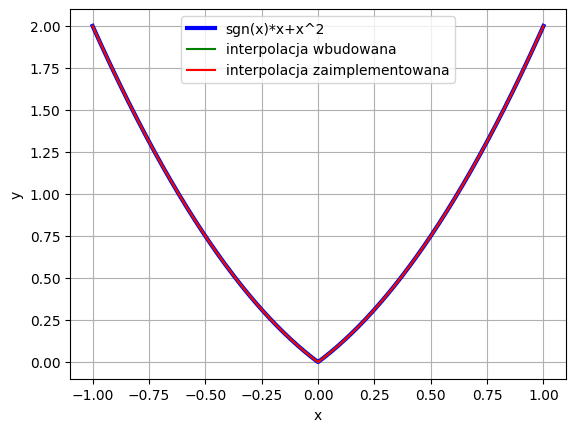

679 ms ± 7.45 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
9.37 s ± 467 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Wyniki dla interpolacji dla 10^n pkt, gdzi n=  10000 

Norma interpolacji wbuodwanej funkcji wynosi:  1.8533453682151573e-06
Norma interpolacji funkcji zaimplementowanej w main wynosi:  1.8533453686746422e-06
Czas potrzebny do interpolacji wbudowanej funkcji:  0.6794370739999431
Czas potrzebny do interpolacji zaimplementowanej funkcji:  9.367527928000055


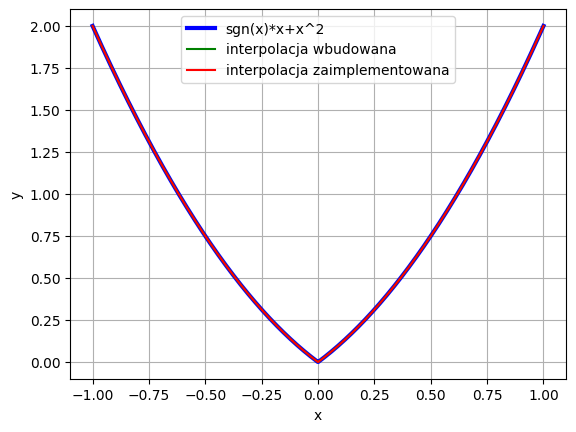

In [83]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-1, 1, 1000)
x=np.array(x)
# Węzły Czebyszewa
for n in [1,2,3,4]:
    n = int(10**n)  # Liczba węzłów
    xch = main.chebyshev_nodes(n)

    xch=np.array(xch)
# Interpoalcja

    yimp = sp.interpolate.barycentric_interpolate(xch, f1(xch), x)
    w=main.bar_cheb_weights(n)
    yimp_main=main.barycentric_inte(xch,f1(xch),w,x)
    time1 = %timeit -r 5 -n 10 -o sp.interpolate.barycentric_interpolate(xch, f1(xch), x)
    time2 = %timeit -r 5 -n 10 -o main.barycentric_inte(xch,f1(xch),w,x)
    

    print("Wyniki dla interpolacji dla 10^n pkt, gdzi n= ",n,"\n")
    print("Norma interpolacji wbuodwanej funkcji wynosi: ",main.L_inf(yimp,f1(x)))
    print("Norma interpolacji funkcji zaimplementowanej w main wynosi: ",main.L_inf(yimp_main,f1(x)))
    print("Czas potrzebny do interpolacji wbudowanej funkcji: ", time1.average)
    print("Czas potrzebny do interpolacji zaimplementowanej funkcji: ", time2.average)

    plt.plot(x, f1(x), 'b', linewidth=3, label=r'sgn(x)*x+x^2')
    plt.plot(x, yimp, 'g', label='interpolacja wbudowana')
    plt.plot(x, yimp_main, 'r', label='interpolacja zaimplementowana')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc=0)
    plt.grid()   
    plt.show()
    


***Analiza i wykonanie zadanie 4.***

W pierwszym podpunkcie tego zadania mamy zaimplementować funkcję *barycentric_inte()*. Służy ona do przeprowadzenia interpolacji metodą barycentryczną dla zadanych węzłów xi i wartości funkcji interpolowanej yi używając wag wi. Zwraca ona wyliczone wartości funkcji interpolującej dla argumentów x w postaci wektora y. Interpolacja tą metodą opiera sie na wzorze:
$\begin{equation}
    p(x)=\frac{\sum_{j=0}^n\frac{w_j}{x-x_j}f_j}{\sum_{j=0}^n\frac{w_j}{x-x_j}}
\end{equation}$
gdzie p(x) - funkcja interpolująca. W celu implementacji tego wyrażenia tworzymy najpierw pętle iterującą po kolejnych wartościach wektora *x* w której definiujemy dwa puste wektory - licznik i mianownik równaina 1, które posłużą do sumowania. Następnie w środku tworzymy kolejną pętle która zadaje kolejne elementy iterując po j ze wzoru 1. Po zakońćzeniu pętli wewnętrznej sumujemy wszystkie elementy licznika i oddzielnie sumujemy wszystkie elementy mianownika i dzielimy licznik/mianownik otrzymując interpolowaną wartość p(x), która zapisujemy do wektora y. Całość powtarzamy iterując po kolejnych artośćiach wektora x. 

W drugim podpunkcie zadania dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadzamy interpolację metodą barycentryczną zarówno przy użyciu funkcji sp.interpolate.barycentric_interpolate() jak i korzystając z zaimplementowanego wzoru barycentrycznego. Wykreślamy wzory interpolacji oraz funkcji interpolowanej. Badamy również normę korzystając z funkcji utworzonej w poprzednim zadaniu. Całość powtarzamy w pętli dla kolejnych n z zakresu tym celu dla $n \in \{1, 2, 3, 4\}$, podająć za liczbę węzłów Czebyszewa $10^n$. n - organiczono do 4 ponieważ bardzo długo zajmowały obliczenia. 
Z otrzymanych wyników widzimy, że zaimplementowana przez nas funkcja osiąga tą samą dokładność co wbudowana funkcja do interpolacji. Widzimy, że błąd przy pierwszej iteracji jest największy ze względu na nieciągłość pierwszej pochodnej, przy argumencie 0. Błąd ten jest jednak już ponad 10 krotnie mniejszy przy zwiększeniu ilości węzłów do 100. Kolejne powiększanie ilości węzłów prowadzi do zmniejszenia poziomu błędu aż do  1e-6 , na poziomie 10^4 węzłów, wiąże się to jednak ze zanczym wydłużeniem procesu do nawet rzędu 10 s dla naszej zaimplementowanej funkcji i ok. 1 s dla wbudowanej funkcji.

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

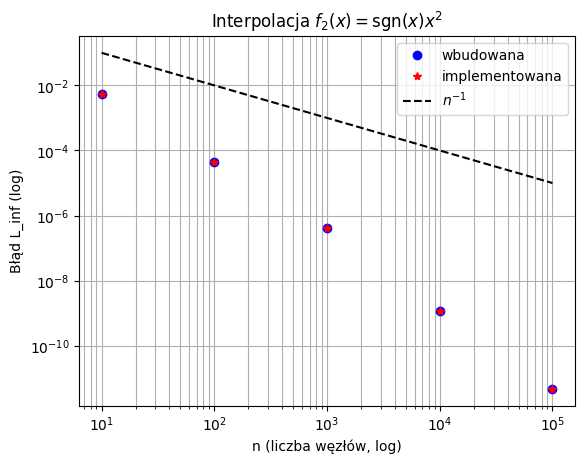

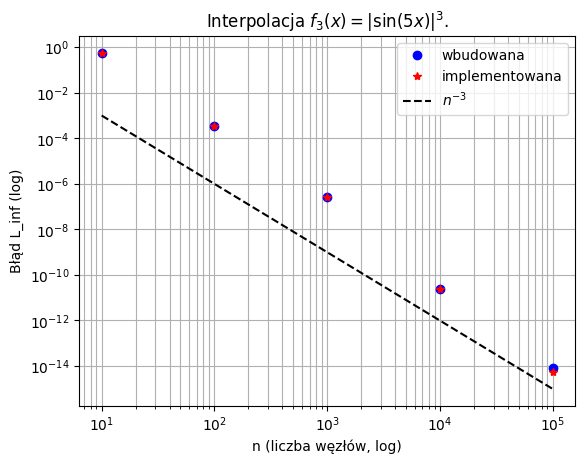

In [70]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-1, 1, 2000)
x = np.array(x)

ns=np.array([10**k for k in [1,2,3,4,5]])
v=1

L_wbud = []
L_imp = []

for n in ns:
    xch = np.array(main.chebyshev_nodes(n))

    yimp = sp.interpolate.barycentric_interpolate(xch, f2(xch), x)
    w = main.bar_cheb_weights(n)
    yimp_main = main.barycentric_inte(xch, f2(xch), w, x)

    L_wbud.append(main.L_inf(yimp, f2(x)))
    L_imp.append(main.L_inf(yimp_main, f2(x)))

plt.figure()
plt.loglog(ns, L_wbud, 'bo', label='wbudowana')
plt.loglog(ns, L_imp, 'r*', label='implementowana')
plt.loglog(ns.astype(float), ns.astype(float)**(-v), 'k--', label=r'$n^{-1}$')
plt.xlabel("n (liczba węzłów, log)")
plt.ylabel("Błąd L_inf (log)")
plt.title("Interpolacja $f_2(x) = \mathrm{sgn}(x)x^{2}$")
plt.grid(True, which="both")
plt.legend()
plt.show()

L_wbud = []
L_imp = []

for n in ns:
    xch = np.array(main.chebyshev_nodes(n))

    yimp = sp.interpolate.barycentric_interpolate(xch, f3(xch), x)
    w = main.bar_cheb_weights(n)
    yimp_main = main.barycentric_inte(xch, f3(xch), w, x)

    L_wbud.append(main.L_inf(yimp, f3(x)))
    L_imp.append(main.L_inf(yimp_main, f3(x)))
v=3

plt.figure()
plt.loglog(ns, L_wbud, 'bo', label='wbudowana')
plt.loglog(ns, L_imp, 'r*', label='implementowana')
plt.loglog(ns.astype(float), ns.astype(float)**(-v), 'k--', label=r'$n^{-3}$')
plt.xlabel("n (liczba węzłów, log)")
plt.ylabel("Błąd L_inf (log)")
plt.title("Interpolacja $f_3(x)=|\sin(5 x)|^3$.")
plt.grid(True, which="both")
plt.legend()
plt.show()


***Wykonanie i analiza zadanie 5.***

W tym zadaniu analize poddajemy funkcje jednoróżniczkowalną f2 i  trzykrotnie różniczkowalną f3. Podobnie jak w poprzednim zadaniu wyznaczamy normę wektorową porównując wartości otrzymane z interpolacji funkcją wbudowaną i zaimplementowaną przez nas, z funkcją analityczną. Uzyskane wyniki przedstawiono na wykresie log-log, gdzie na osi x podana jest liczba węzłów postaci 10^n, a na osi y błąd zadany normą L_inf. Na wykresach logarytmicznych widzimy zależność zbliżoną do liniowej, gdzie błąd interpolacji zmniejsza się wraz ze wzrostem liczby węzłów. Na wykresach umieszczono także  $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji. Widzimy, że dla dużych n im funckja jest więcej razy różniczkowalna tym błąd interpolacji jest mniejszy. Natomiast dla małych na funkcja jednokrotnie różniczkowalna była duzo lepiej odtworzona. Porównując błedy interpolacji funkcji wbudowanej  i zaimplementowanej widzimy, że wyniki sa niemal identycznie poza niewielkimi różnicami, przy poziomie zera maszynowego.

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

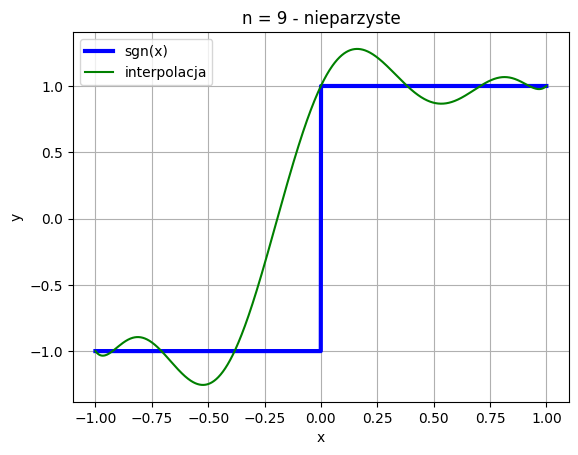

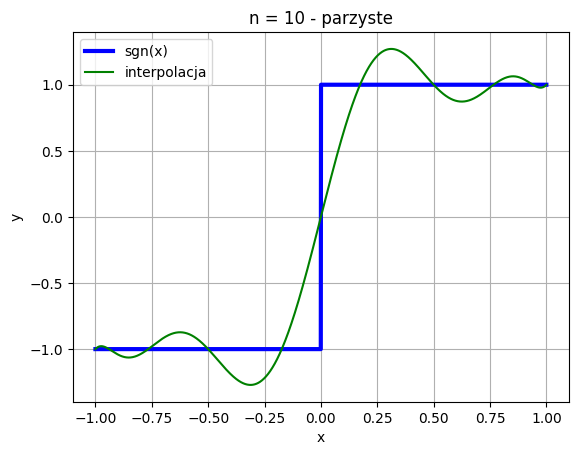

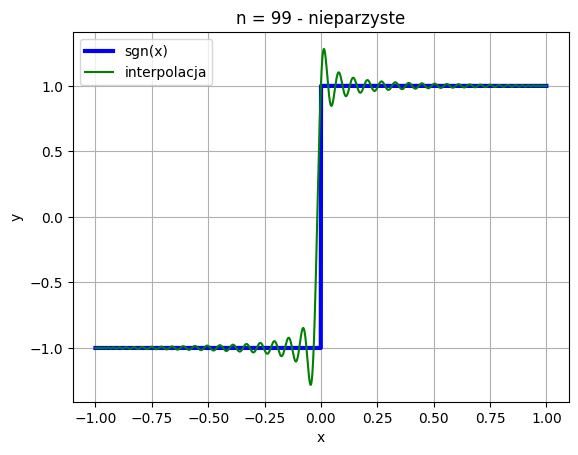

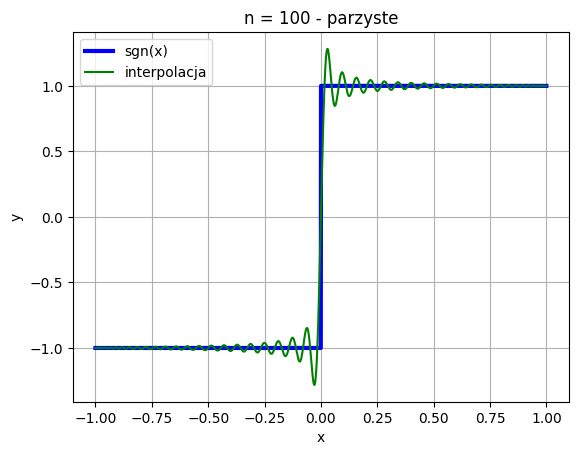

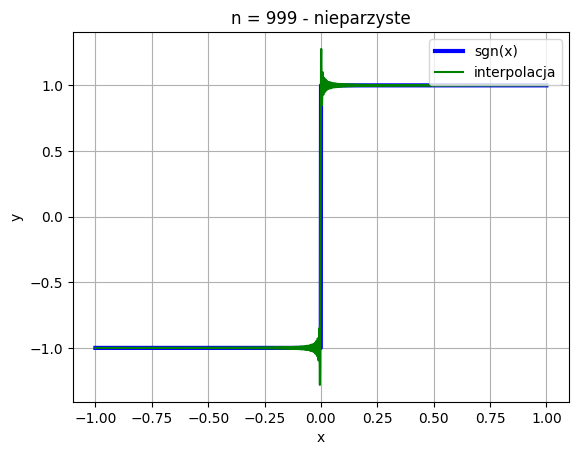

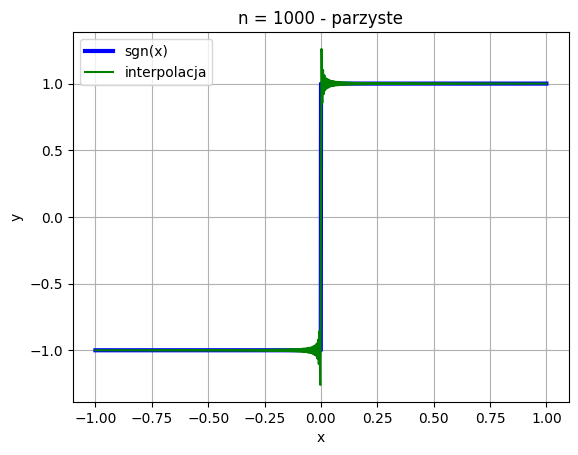

Minimalny błąd niezależny od rzędu dla parzystych n: 0.6346980363585326
Minimalny błąd niezależny od rzędu dla nieparzystych n: 1.7405732563559102


In [78]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-1, 1, 2000)
x = np.array(x)
L_parz=[]
L_niep=[]
for n in [9,10, 99,100, 999,1000]:
    xch = np.array(main.chebyshev_nodes(n))

    yimp = sp.interpolate.barycentric_interpolate(xch, f5(xch), x)
    L_wbud.append(main.L_inf(yimp, f5(x)))


    if n % 2 == 0:
        tekst = f'n = {n} - parzyste'
        L_parz.append(main.L_inf(yimp,f5(x)))
    else:
        tekst = f'n = {n} - nieparzyste'
        L_niep.append(main.L_inf(yimp,f5(x)))

    plt.plot(x, f5(x), 'b', linewidth=3, label=r'sgn(x)')
    plt.plot(x, yimp, 'g', label='interpolacja')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc=0)
    plt.title(tekst)
    plt.grid()   
    plt.show()

print("Minimalny błąd niezależny od rzędu dla parzystych n:",np.min(L_parz))
print("Minimalny błąd niezależny od rzędu dla nieparzystych n:",np.min(L_niep))


***Wykonanie i analiza zadanie. 6***

W tym zadaniu analizie poddamy funkcje nieciągła f5(x). Będziemy porównywać interpolacje funkcji gdzie n jest parzyste oraz nieparzyste ale dla podobnego rzędu wielkości oraz wyznaczymy minimalną bład niezależny od rzędu. W pętli po n zapisujemy oddzielnie błedy dla parzystych i nieparzystych n, oraz rysujemy wyniki interpolacji. Na wykresach widzimy wyraźnie Efekt Gibbsa, który polega na tym, że w miarę zwiększania liczby węzłów interpolacji funkcji nieciągłej, w pobliżu punktu nieciągłości pojawiają się oscylacje, których wartość maskymlana przy pierwszym przekroczeniu skoku wynosi około 9% wysokości skoku. Oscylacje te nie zanikają wraz ze wzrostem liczby węzłów, lecz stają się coraz bardziej skoncentrowane wokół punktu skoku, w efekcie czego całkowity „obszar” pod nimi dąży do zera. Otrzymany przez nas minimalny błąd dla wartości parzystych wynosi ok. 0.63, natomiast dla wartości nieparzystych: 1.75. Różnica ta wynika z tego, że gdy skok pokrywa się z węzłem (n-nieparzyste), interpolacja osiąga większy błąd w pobliżu tego punktu, natomiast gdy skok znajduje się między węzłami (n-parzyste), efekt Gibbsa powoduje mniejsze maksymalne odchylenie, stąd minimalny błąd dla parzystych n jest mniejszy.

---

***WNIOSKI***

Na laboratorium poznalismy metodę interpolacji węzłami barycentrycznymi Czebyszewa. Minimalizuje ona efekt Runge’a i daje wyniki bliski orginalnej funkcji zarówno dla tych gładkich, jak i nie różniczkowalnych czy nawet nie ciągłych. Zaobserwowaliśmy, że błąd interpolacji zmniejsza się wraz ze wzrostem liczby węzłów. Dla funkcji nieciągłej zaobserwowaliśmy efekt Gibbsa – oscylacje w pobliżu skoku, których amplituda nie zanika, ale staje się coraz bardziej skoncentrowane. Minimalny błąd zależy od tego, czy liczba węzłów jest parzysta czy nieparzysta, z naszych wyników wyszło, że jest mniejszy dla parzystych, gdy skok znajduje się między węzłami.

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)